In [2]:
import tensorflow as tf


In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
import os
import cv2
root_path = os.getcwd()
train_path = root_path + "/cats_and_dogs_filtered/train"
val_path = root_path + "/cats_and_dogs_filtered/test"

In [6]:
input_size = (64,64)
input_shape = (64,64,3)

def load_img(img_path):

    img = cv2.imread( img_path)
    img = cv2.resize(img,input_size)
    return img
    

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_dataset(val_path: str):
    cur_x, cur_y = [],[]
    for cur_class in os.listdir(val_path):
        label = ""
        if cur_class == "cats":
            label = [1,0]
        else:
            label = [0,1]

        for filename in os.listdir(val_path + "/" + cur_class):
            img_path = val_path+ "/" + cur_class+"/"+filename
            img = load_img(img_path)
            cur_x.append(img)
            cur_y.append(label)

    return np.array(cur_x), np.array(cur_y)

In [9]:
x_train, y_train = load_dataset(train_path)
x_val, y_val = load_dataset(val_path)

print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)

x_train:  (750, 64, 64, 3)
y_train:  (750, 2)


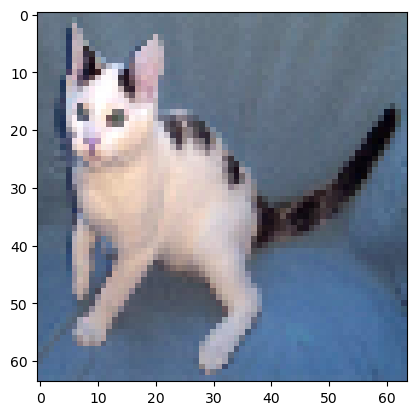

In [10]:
index = 20
plt.imshow(x_val[index])

In [11]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense,Flatten,MaxPooling2D

model = Sequential([
    Conv2D(32,(3,3),activation="relu", input_shape=input_shape),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation="relu"),
    Dense(2,activation="softmax")
])

C:\Users\Myint Myat Thu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,410 (6.20 MB)

 Trainable params: 1,625,410 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
print((3 * 3 * 3 + 1) * 32)

print((3 * 3 * 32 + 1) * 64)

print(14 * 14 *  64)

# flatten
print( ( 12544 + 1) *128)


print((128 + 1) * 2)


print("total: ",896 + 18496  + 1605760 + 258)

896
18496
12544
1605760
258
total:  1625410


In [15]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

In [16]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data = (x_val,y_val),
    batch_size = 16,
    epochs = 10,
    verbose =1)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.5293 - loss: 28.4190 - val_accuracy: 0.5000 - val_loss: 0.7043
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6920 - loss: 0.5795 - val_accuracy: 0.5800 - val_loss: 0.7458
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8147 - loss: 0.4089 - val_accuracy: 0.5733 - val_loss: 0.8154
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8840 - loss: 0.2692 - val_accuracy: 0.5667 - val_loss: 0.9906
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9240 - loss: 0.1851 - val_accuracy: 0.5867 - val_loss: 1.3959
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9480 - loss: 0.1365 - val_accuracy: 0.5467 - val_loss: 1.8617
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9773 - loss: 0.0789 - val_accuracy: 0.5600 - val_loss: 2.4089
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9867 - loss: 0.0489 - val_accuracy: 0.5667 - 

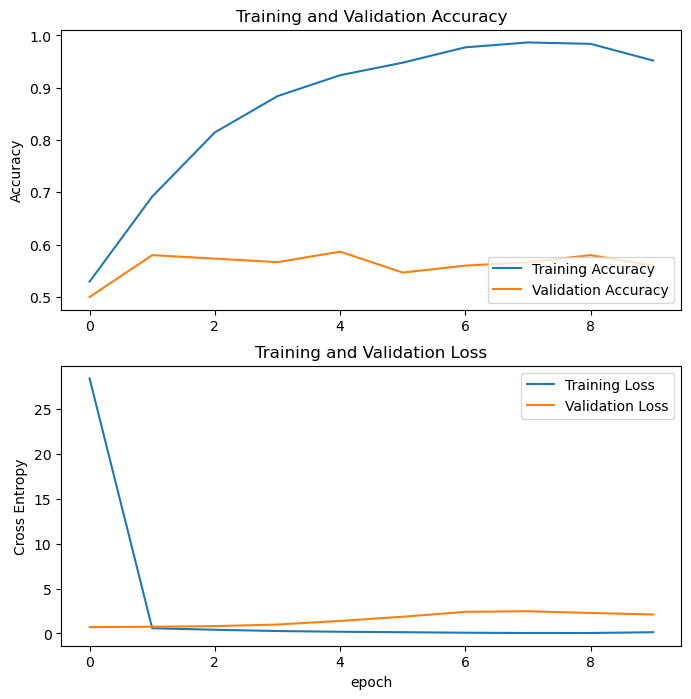

In [19]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


cats


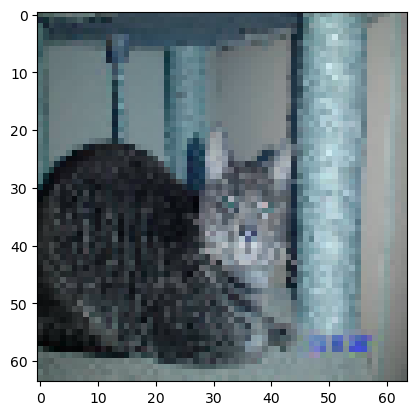

In [21]:

index = 10
test_label = y_train[index]
test_img = x_train[index]

labels =["cats","dogs"]
print(labels[np.argmax(test_label)])
plt.imshow(test_img)

sample

In [22]:
sample_img = np.array([test_img])
print(sample_img.shape)



_pred = model.predict(sample_img)
print("_pred : ",_pred)

print("_pred class: ",labels[np.argmax(_pred)])

(1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
_pred :  [[0.92295027 0.0770497 ]]
_pred class:  cats
